In [1]:
import torch
from vision.datasets.open_images import OpenImagesDataset
from vision.utils import box_utils, measurements
from vision.utils.misc import str2bool, Timer
import pathlib
import numpy as np
import logging
import sys
from PIL import Image, ImageFilter
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite_predictor
from vision.ssd.mobilenetv3_ssd_lite import create_mobilenetv3_small_ssd_lite
import time
import cv2
import pandas as pd
import glob

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
trained_model = "./models/gaku_cornv12_pseudo/mbv3-Epoch-105-Loss-2.2475780916213988.pth" #モデルパス
nms_method = "hard"
iou_threshold = 0.5 #"The threshold of Intersection over Union."
use_2007_metric = True
#eval_dir = "eval_results" #The directory to store evaluation results
label_file = "./models/gaku_cornv12_pseudo/open-images-model-labels.txt" #The label file path
class_names = [name.strip() for name in open(label_file).readlines()]

In [3]:
net = create_mobilenetv3_small_ssd_lite(len(class_names), is_test=True)
t1 = time.time()
net.load(trained_model)
net = net.to(DEVICE)
predictor = create_mobilenetv2_ssd_lite_predictor(net, nms_method=nms_method, device=DEVICE)

In [4]:
df = pd.read_csv("./all_images/sub-test-annotations-bbox.csv")
df = df["ImageID"]
#img_paths = glob.glob("./all_images/*.JPG")
img_paths = np.unique(df.values)

In [5]:
#print(img_paths)

Inference time:  0.2780303955078125


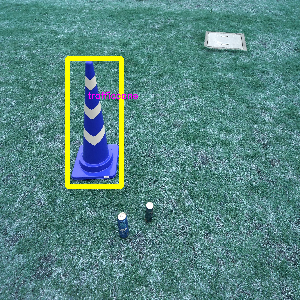

In [6]:
for img_path in img_paths[:5]:
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300, 300))
    boxes, labels, probs = predictor.predict(image, 10, 0.15)
    
    for i in range(len(boxes)):
        box = boxes[i, :]
        box = list(map(int, box))
        flag = 1
        label = class_names[labels[i]]
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
        cv2.putText(image, label,
                    (int(box[0]) + 20, int(box[1]) + 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.3,  # font scale
                    (255, 0, 255),
                    1)  # line type
    display(Image.fromarray(image))

In [7]:
"""
img_path = "./all_images/DSC01447.JPG"

image = cv2.imread(img_path)
image = cv2.resize(image, (300, 300))
imlis = []
image1 = image[:150, :]
imlis.append(image1)
image2 = image[150:300, :]
imlis.append(image2)
"""
"""
image3 = image[150:300, :150]
imlis.append(image3)
image4 = image[150:300, 150:300]
imlis.append(image4)
"""
"""
imagecp = image.copy()

boxes, labels, probs = predictor.predict(image, 10, 0.4)

for i in range(len(boxes)):
    box = boxes[i, :]
    box = list(map(int, box))
    flag = 1
    label = class_names[labels[i]]
    cv2.rectangle(imagecp, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
    cv2.putText(imagecp, label,
                (int(box[0]) + 20, int(box[1]) + 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.3,  # font scale
                (255, 0, 255),
                1)  # line type
display(Image.fromarray(imagecp))

for i in range(len(imlis)):
    imlis[i] = cv2.resize(imlis[i], (300, 300))
    boxes, labels, probs = predictor.predict(imlis[i], 10, 0.4)
    for l in range(len(boxes)):
        box = boxes[l, :]
        box = list(map(int, box))
        label = class_names[labels[l]]
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(300, box[2])
        box[3] = min(300, box[3])
        ratio = (box[3] - box[1]) * (box[2] - box[0]) / 90000
        cv2.rectangle(imlis[i], (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
        cv2.putText(imlis[i], label,
                    (int(box[0]) + 20, int(box[1]) + 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.3,  # font scale
                    (255, 0, 255),
                    1)  # line type
        print(f"label is {label}, ratio is {ratio}, conf is {probs[l]}")
    display(Image.fromarray(imlis[i]))
"""

NameError: name 'imlis' is not defined